In [ ]:
#ライブラリのインポート
#グラフ描画用
import matplotlib.pyplot as plt
#行列ベクトル配列計算
import numpy as np
#データ読み込み配列操作グラフ化
import pandas as pd

In [26]:
#Webからデータを直接読み込む
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
"""
#アップロードしたデータを読み込む
df=pd.read_csv("iris-data.csv",header=None)
df
"""

'\n#アップロードしたデータを読み込む\ndf=pd.read_csv("iris-data.csv",header=None)\ndf\n'

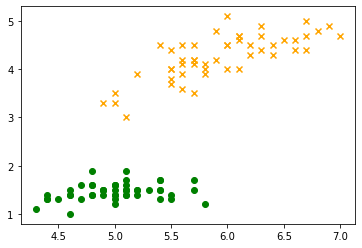

In [28]:
#グラフでデータを確認する
#必要なデータを抽出する
X=df.iloc[0:100,[0,2]].values
X
#グラフの描画
plt.scatter(X[:50,0],X[:50,1],color="green",marker="o",label="setosa")
plt.scatter(X[50:,0],X[50:,1],color="orange",marker="x",label="versicolor")
plt.show()

In [ ]:
#パーセプトロンの実装
#使う変数の整理
eta=0.5 #学習率（0<eta<1） 型：float
epoch=100 #トレーニング回数
#重み
w0=0.5 #バイアス
w1=0.5
w2=0.5
#特徴データ
X1=df.iloc[0:100,0].values
X2=df.iloc[0:100,2].values
#正解ラベル
Y=df.iloc[0:100,4].values
Y=np.where(Y=="Iris-setosa",0,1)

#エラーの数
errors=[]

#内側のfor文が外側のfor文で100回ループ(epochの数だけループ)
for _ in range(epoch):
  #エポック毎のエラーをカウントする
  error=0
  for x1,x2,target in zip(X1,X2,Y):
    #print(x1,x2,target)
    #総入力値計算
    in_=w1*x1+w2*x2+w0
    #活性化関数による出力の計算(ステップ関数)
    out_=0
    if(in_>=0):
      out_=1
    else:
      out_=0
    #重みの更新
    update=eta*(target-out_)
    w0+=update
    w1+=update*x1
    w2+=update*x2
    
    #誤差が0でない場合はエラーとしてカウントする
    if(update!=0):
      error+=1

    #print(x1,x2,in_,out_,w0,w1,w2))

  #エポック毎のエラーを配列に格納する
  errors.append(error)

#errors

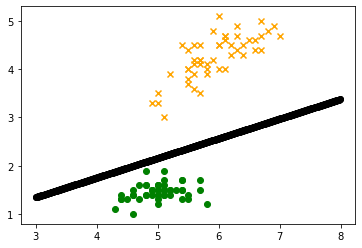

In [32]:
#トレーニングデータと決定境界を描画する
plt.scatter(X[:50,0],X[:50,1],color="green",marker="o",label="setosa")
plt.scatter(X[50:,0],X[50:,1],color="orange",marker="x",label="versicolor")

#グラフをプロット
for i in range(300,800):
  plt.scatter(i/100,-(w0+w1*(i/100))/w2,color="black",marker="o")

plt.show()